In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

In [30]:
np.random.seed(42)
x = np.random.randn(1,100)
a, b = 2,1
eps = .1 * np.random.randn(1,100)
y = a * x + b + eps
x.shape, y.shape



((1, 100), (1, 100))

In [31]:
new_ind = np.arange(100)
np.random.shuffle(new_ind)
new_ind

array([93, 28, 55, 30, 80, 17, 54, 76, 10,  9,  2, 87, 46, 98, 84, 82, 26,
       69, 85, 52, 40, 67, 99, 63, 83,  0, 45, 11, 95, 22, 66, 20, 33, 90,
       27, 37, 97, 18, 70, 86, 77, 39, 34, 29, 72, 81, 58,  3, 92,  4, 60,
       43, 78, 96, 36, 94, 53, 74,  5, 91, 51, 48, 73, 79, 68, 21, 61, 71,
       57, 88, 50, 62, 31, 65, 14, 75, 13, 15,  7, 64, 19, 44, 35, 56,  6,
       59, 12, 23, 24, 49, 25, 41, 38, 47, 42,  8, 32, 16, 89,  1])

In [32]:
train_idx = new_ind[:70]
test_idx = new_ind[70:]
x_train, y_train = x[0][train_idx], y[0][train_idx]
x_test, y_test = x[0][test_idx], y[0][test_idx]


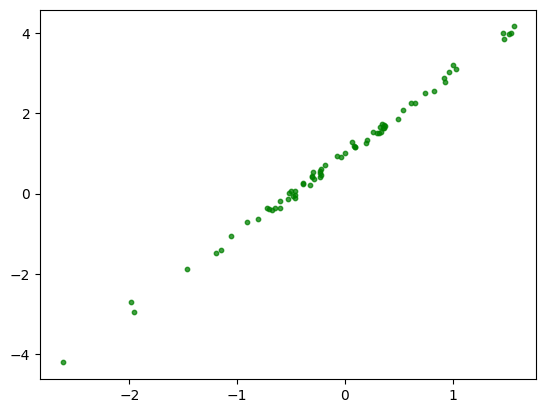

In [33]:

def plot_line_or_scatter(type_plot, x_data, y_data, x_label = "", y_label = ""
                         , title = "", color = 'g', yscale_log = False):
    _, ax = plt.subplots()
    if type_plot == "scatter":
        ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)
    else:
        ax.plot(x_data, y_data, lw = 2, color = color)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

plot_line_or_scatter("scatter", x_train, y_train)

In [34]:
a = np.random.randn(1)
a

array([-0.23739196])

In [35]:
b = np.random.randn(1)
b

array([1.87200568])

In [36]:
lr = 1e-3 #шаг обучения
epochs = 990 #количество итераций обучения, назовем их эпохами.

In [37]:
Loss = [] #массив для значения функции ошибки
for ep in range(epochs):
    y_pred = b + a*x_train
    error = (y_pred - y_train)

    loss = (error**2).mean()
    Loss.append(loss)
    b_grad = 2 * error.mean()
    a_grad = 2 * (x_train * error).mean()

    a = a - lr*a_grad
    b = b - lr*b_grad

    if ep % 20 == 0 or ep == epochs - 1:
        print('ep: %3d  loss: %8.6f   a=%4.3f  b=%4.3f'%(ep,loss,a,b))


ep:   0  loss: 4.367004   a=-0.234  b=1.870
ep:  20  loss: 4.099925   a=-0.173  b=1.830
ep:  40  loss: 3.849859   a=-0.113  b=1.793
ep:  60  loss: 3.615680   a=-0.055  b=1.756
ep:  80  loss: 3.396338   a=0.001  b=1.722
ep: 100  loss: 3.190855   a=0.056  b=1.689
ep: 120  loss: 2.998321   a=0.109  b=1.657
ep: 140  loss: 2.817886   a=0.161  b=1.627
ep: 160  loss: 2.648761   a=0.211  b=1.597
ep: 180  loss: 2.490207   a=0.260  b=1.570
ep: 200  loss: 2.341537   a=0.307  b=1.543
ep: 220  loss: 2.202111   a=0.354  b=1.517
ep: 240  loss: 2.071330   a=0.399  b=1.493
ep: 260  loss: 1.948637   a=0.442  b=1.470
ep: 280  loss: 1.833512   a=0.485  b=1.447
ep: 300  loss: 1.725469   a=0.526  b=1.426
ep: 320  loss: 1.624055   a=0.566  b=1.406
ep: 340  loss: 1.528847   a=0.605  b=1.386
ep: 360  loss: 1.439450   a=0.643  b=1.367
ep: 380  loss: 1.355495   a=0.680  b=1.350
ep: 400  loss: 1.276639   a=0.715  b=1.332
ep: 420  loss: 1.202559   a=0.750  b=1.316
ep: 440  loss: 1.132954   a=0.784  b=1.300
ep: 460

C:\Users\MateBook\AppData\Local\Temp\ipykernel_23256\578688893.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('ep: %3d  loss: %8.6f   a=%4.3f  b=%4.3f'%(ep,loss,a,b))


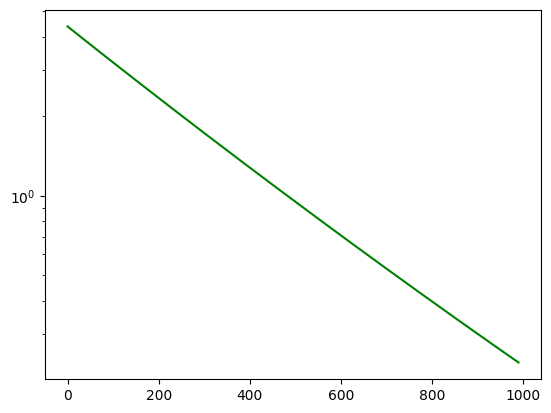

In [38]:
plt.plot(np.arange(epochs), Loss, color='g')
plt.yscale('log')

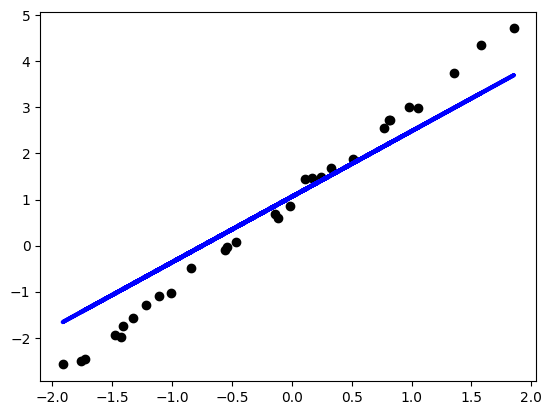

In [39]:
y_test_pred = b + a*x_test
plt.scatter(x_test, y_test, color = 'black')
plt.plot(x_test, y_test_pred, color = 'blue', lw = 3)
plt.show()

Обученные параметры: b=0.9860 a=1.9868


C:\Users\MateBook\AppData\Local\Temp\ipykernel_23256\658747493.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Обученные параметры: b=%6.4f a=%6.4f'%(linr.intercept_, linr.coef_))


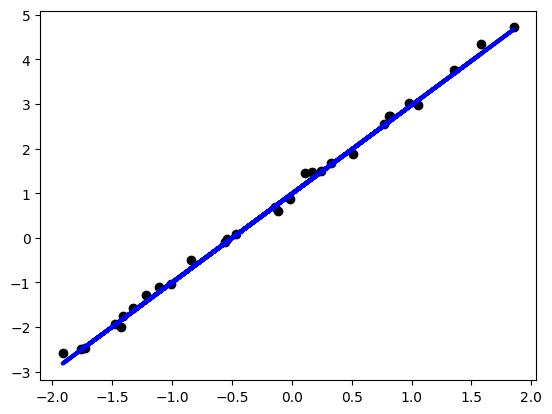

In [40]:
linr = LinearRegression()
linr.fit(x_train.reshape(70,1), y_train.reshape(70,1))
print('Обученные параметры: b=%6.4f a=%6.4f'%(linr.intercept_, linr.coef_)) 

y_test_pred=linr.predict(x_test.reshape(30,1))# посчитаем выход модели на тестовых примерах
plt.plot(x_test, y_test_pred, color='blue', linewidth=3)# нарисуем его
plt.scatter(x_test, y_test,  color='black') # и желаемый
plt.show()

In [41]:
from sklearn.datasets import load_wine

data_wine = load_wine()
data_wine.target[[10, 80, 140]]


array([0, 1, 2])

In [42]:
list(data_wine.target_names)
X = data_wine.data
y = data_wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [43]:
X_train[:3]
lin_clf = LinearRegression()
lin_clf.fit(X_train, y_train)
print(f"Смещение {lin_clf.intercept_:6.4f}")
print(f"Множители {lin_clf.coef_}")

Смещение 3.5602
Множители [-1.08457208e-01  3.89996076e-02 -1.67175869e-01  3.13347273e-02
 -4.41904488e-04  2.50423591e-01 -5.36233022e-01 -6.79235939e-01
  1.33499975e-01  6.18988521e-02 -4.70302753e-02 -2.60791691e-01
 -6.76736578e-04]


0.841080230207073


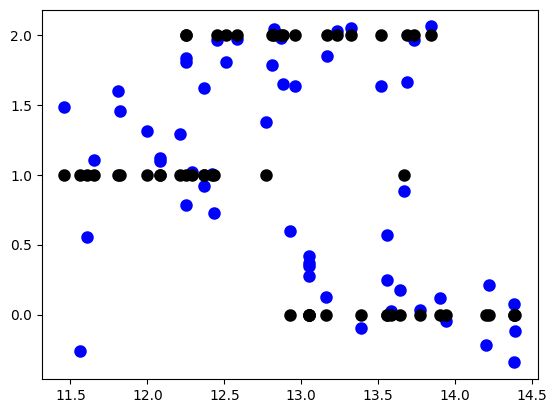

In [44]:
y_predicted = lin_clf.predict(X_test)
score = lin_clf.score(X_test, y_test)
print(score)
i = 0
plt.scatter((X_test[:, i]), y_predicted, color = 'blue', lw = 3)
plt.scatter((X_test[:, i]), y_test, color = 'black', lw = 3)

In [45]:
y_pred_class = np.rint(y_predicted)
y_pred_class[y_pred_class > 2] = 2
y_pred_class[y_pred_class < 0] = 0
y_pred_class = y_pred_class.astype(int)
score=np.sum(y_pred_class==y_test)/len(y_test)
y_pred_class


array([0, 0, 2, 1, 2, 1, 2, 1, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 0, 2, 2,
       1, 1, 0, 0, 2, 0, 1, 0, 1, 0, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0,
       1, 2, 0, 0, 1, 2, 1, 1, 1, 0])

Text(0.5, 1.0, 'expit(x)')

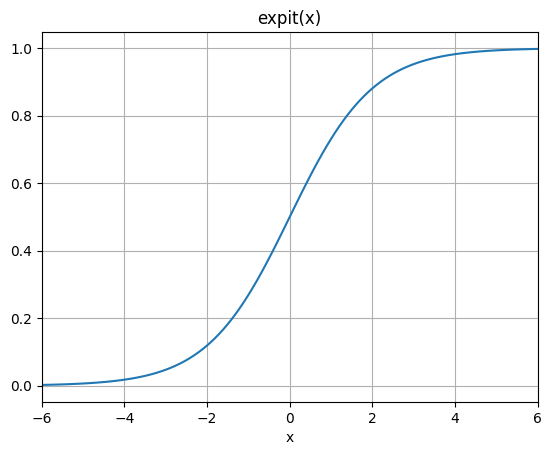

In [46]:
from scipy.special import expit
x = np.linspace(-6, 6, 121)
y = expit(x)
plt.plot(x, y)
plt.grid()
plt.xlim(-6,6)
plt.xlabel('x')
plt.title("expit(x)")

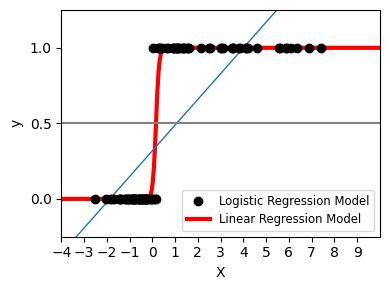

In [47]:
from sklearn import linear_model

n_samples = 100
np.random.seed(42)
X = 1*np.random.normal(size=n_samples)
y = (X>0).astype(float)
X[X>0] *= 4
X += .3 * np.random.normal(size=n_samples)
X = X[:, np.newaxis] #добавим новое измерение к массиву
log_reg = linear_model.LogisticRegression(C=1e5, max_iter=200)
log_reg.fit(X, y)
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color = 'black', zorder = 20)
X_test = np.linspace(-5, 10, 300)
loss = expit(X_test * log_reg.coef_ + log_reg.intercept_).ravel()
loss1 = log_reg.predict_proba(X_test[:, np.newaxis])[:,1].ravel()
plt.plot(X_test, loss1, color='red', linewidth=3) 

ols = linear_model.LinearRegression() # линейная регрессия
ols.fit(X, y) # обучаем ее
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5') 
plt.ylabel('y') #
plt.xlabel('X') #
plt.xticks(range(-5, 10)) #
plt.yticks([0, 0.5, 1]) #
plt.ylim(-.25, 1.25) #
plt.xlim(-4, 10) #
plt.legend(('Logistic Regression Model', 'Linear Regression Model'), #
           loc="lower right", fontsize='small') #
plt.tight_layout() #
plt.show() #

In [48]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

RANDOM_STATE = 42

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    brier_score_loss,
)

from sklearn.calibration import CalibratedClassifierCV

url = r'.\S05-hw-dataset.csv'
df = pd.read_csv(url, sep=',')
df.head() #первые 5 строк из датасета 

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [50]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [51]:
df.default.value_counts(normalize=True)


default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

In [52]:
'''В датасете 3000 объектов и 17 признаков'''
'''явных аномалий в датасете не обнаружено'''
'''целевая переменная default распределена на два класса 1 - зафиксированная просрочка 0 - незафиксированная'''

'целевая переменная default распределена на два класса 1 - зафиксированная просрочка 0 - незафиксированная'

In [ ]:
feature_columns = ['age', 'income', 'years_employed', 'credit_score', 'debt_to_income', 'num_credit_cards', 'num_late_payments',
     'has_mortgage', 'has_car_loan', 'savings_balance', 'checking_balance', 'region_risk_score',
      'phone_calls_to_support_last_3m', 'active_loans', 'customer_tenure_years']

X = df[feature_columns]
y = df['default']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=RANDOM_STATE, stratify=y_temp)

baseline = DummyClassifier(strategy='most_frequent', random_state=RANDOM_STATE)
baseline.fit(X_train, y_train)

y_val_pred_baseline = baseline.predict(X_val)
y_val_proba_baseline = baseline.predict_proba(X_val)[:,1]
print("Accuracy: ", accuracy_score(y_val, y_val_pred_baseline))
try:
    print("ROC-AUC: ", roc_auc_score(y_val, y_val_proba_baseline))
except ValueError as e:
    print("Не удалось посичтать ROC-AUC", e)
#модель выдает самы частный встречающийся класс, нужно для установки порога качества,
#  при сравнении моделей — помогает понять , оправдывает ли сложность модели её прирост в точности.

log_reg_pipline = Pipeline(
    steps=[
        ("Scaler",StandardScaler()),
        (
            'logreg',
            LogisticRegression(
                penalty='l2',
                C=1.0,
                solver='liblinear',
                random_state=RANDOM_STATE,
            ),
        ),
    ]
)

log_reg_pipline.fit(X_train, y_train)
y_val_pred = log_reg_pipline.predict(X_val)
y_val_proba = log_reg_pipline.predict_proba(X_val)[:, 1]

print("Accuracy: ", accuracy_score(y_val, y_val_pred))
print("ROC-AUC: ", roc_auc_score(y_val, y_val_proba))
print("\nПодробны отчет по классам  (classification_report):")
print(classification_report(y_val, y_val_pred, tar))

Accuracy:  0.59
ROC-AUC:  0.5
Accuracy:  0.8166666666666667
ROC-AUC:  0.8746382802811079

Подробны отчет по классам  (classification_report):


c:\Users\MateBook\MLtask\MLtask\homeworks\HW05\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


ValueError: Number of classes, 2, does not match size of target_names, 3000. Try specifying the labels parameter